<a href="https://colab.research.google.com/github/insightcs24/digitaldiary/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [78]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [79]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [80]:
data = load_data('ZOMATO.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
0,2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
1,2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2,2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
3,2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
4,2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089


In [81]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-81-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
0,126.000000,138.899994,115.000000,116.000000,694895290
1,140.649994,143.750000,125.300003,126.349998,249723854
2,132.899994,147.800003,127.750000,141.699997,240341900
3,131.199997,135.000000,123.550003,131.000000,159793731
4,141.550003,144.000000,132.199997,134.949997,117973089


Visualizing Closing Price

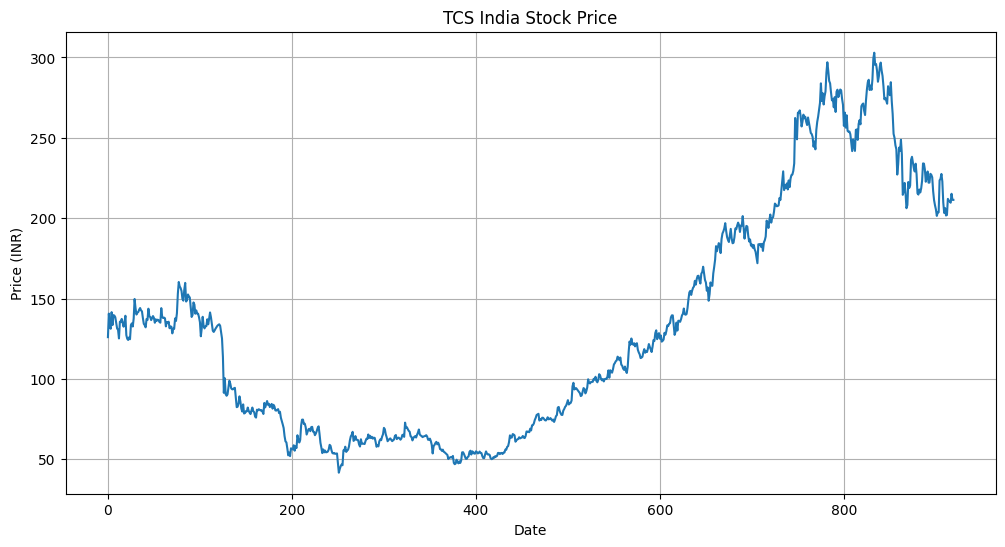

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [83]:
df

Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
0,126.000000,138.899994,115.000000,116.000000,694895290
1,140.649994,143.750000,125.300003,126.349998,249723854
2,132.899994,147.800003,127.750000,141.699997,240341900
3,131.199997,135.000000,123.550003,131.000000,159793731
4,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...
915,210.529999,212.580002,205.669998,211.839996,48296676
916,209.630005,211.000000,194.800003,196.000000,64932923
917,215.190002,219.190002,210.809998,213.190002,62002510


# Plotting moving averages of 100 day

---



In [84]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,ZOMATO.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
915,244.4961
916,244.0062
917,243.5482
918,243.0781


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

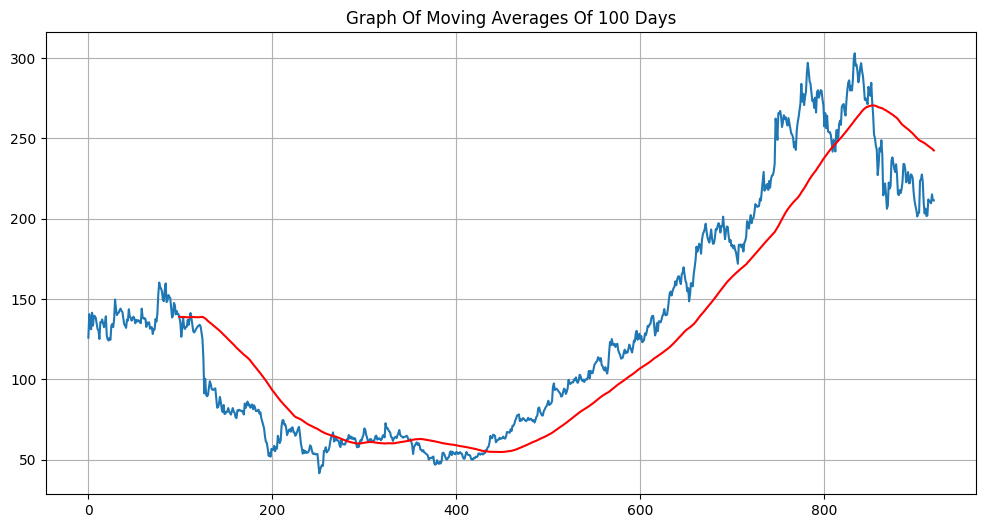

In [85]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [86]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,ZOMATO.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
915,246.49740
916,246.55310
917,246.64380
918,246.73100


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

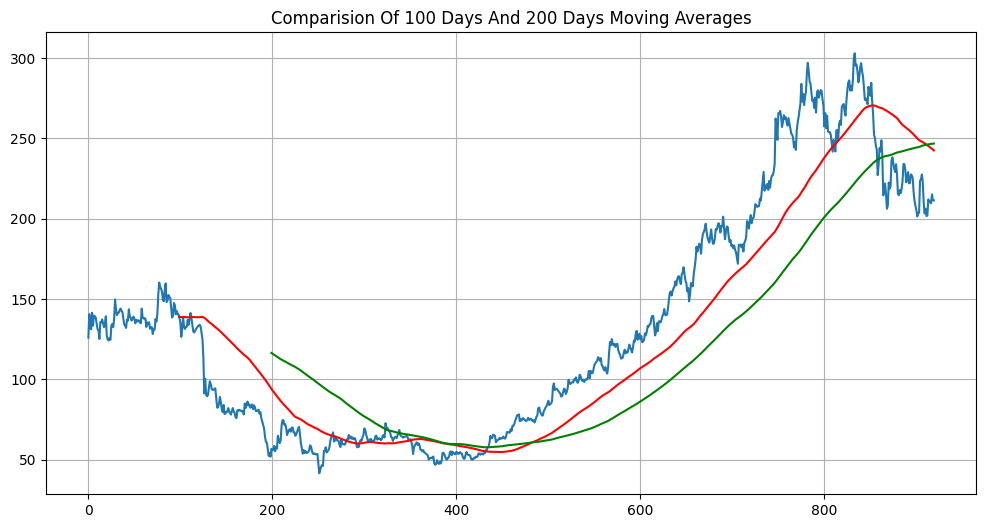

In [87]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [88]:
df.shape

(920, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [89]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(644, 6)
(276, 6)


In [90]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
0,2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
1,2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2,2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
3,2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
4,2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089


In [91]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
644,2024-02-28,159.350006,161.949997,155.350006,161.899994,41883110
645,2024-02-29,165.449997,168.850006,155.449997,156.449997,175785440
646,2024-03-01,166.500000,173.500000,165.600006,168.000000,42587331
647,2024-03-04,169.800003,175.600006,168.000000,168.000000,55751426
648,2024-03-05,165.850006,171.500000,164.050003,170.750000,29313864


# Using MinMax scaler for normalization of the dataset

---



In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [93]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [94]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.6043426 ],
       [0.6875754 ],
       [0.81101729],
       [0.72496986],
       [0.75673502],
       [0.818255  ],
       [0.7631685 ],
       [0.77322077],
       [0.79573788],
       [0.78729395],
       [0.76115804],
       [0.73622836],
       [0.72496986],
       [0.66063532],
       [0.76236427],
       [0.74788909],
       [0.76839563],
       [0.73944516],
       [0.75311623],
       [0.75673502],
       [0.77965425],
       [0.69481305],
       [0.68476078],
       [0.67872941],
       [0.68958585],
       [0.69963813],
       [0.74909532],
       [0.75351834],
       [0.73301168],
       [0.76477684],
       [0.87173303],
       [0.83675108],
       [0.80538804],
       [0.80860472],
       [0.82348213],
       [0.83876153],
       [0.82106956],
       [0.82147167],
       [0.81785288],
       [0.77885002],
       [0.77482911],
       [0.76035381],
       [0.75311623],
       [0.77764379],
       [0.79614   ],
       [0.82870926],
       [0.78126259],
       [0.790

In [95]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [96]:
x_train.shape

(544, 100, 1)

# ML Model (LSTM)

---



In [97]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [98]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [100]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1362 - mean_absolute_error: 0.2860
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0295 - mean_absolute_error: 0.1361
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0931
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0925
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0100 - mean_absolute_error: 0.0760
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0128 - mean_absolute_error: 0.0801
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0142 - mean_absolute_error: 0.0817
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0095 - mean_absolute_error: 0.0718
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0729
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0089 - mean_absolute_error: 0.0672
Epoch 11/100
17/17 ━━━━━━━━━

In [101]:
model.save('keras_model.h5')

In [102]:
test_close.shape

(276, 1)

In [103]:
past_100_days = pd.DataFrame(train_close[-100:])

In [104]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [106]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [107]:
final_df.head()

,0
0,101.000000
1,104.400002
2,102.599998
3,106.400002
4,103.800003


In [109]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01669122],
       [0.00785468],
       [0.02650958],
       [0.01374572],
       [0.01914581],
       [0.02847326],
       [0.04516444],
       [0.04344623],
       [0.05351007],
       [0.05645557],
       [0.06627393],
       [0.05400098],
       [0.06381934],
       [0.06283752],
       [0.02282769],
       [0.03190967],
       [0.03117328],
       [0.02552772],
       [0.03362787],
       [0.02258222],
       [0.01963672],
       [0.03829162],
       [0.09131074],
       [0.11070202],
       [0.10309278],
       [0.11904761],
       [0.10309278],
       [0.10628375],
       [0.10947473],
       [0.09769269],
       [0.10309278],
       [0.10726557],
       [0.08615612],
       [0.0736377 ],
       [0.06185566],
       [0.06455572],
       [0.06823761],
       [0.07854688],
       [0.08738342],
       [0.08345606],
       [0.08713794],
       [0.08296515],
       [0.07928326],
       [0.09131074],
       [0.10800196],
       [0.09302894],
       [0.088

In [110]:
input_data.shape

(376, 1)

# Testing the model

---



In [111]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [112]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(276, 100, 1)
(276,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [113]:
# Making predictions

y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step


In [114]:
y_pred.shape

(276, 1)

In [115]:
y_test

array([0.29896902, 0.27221401, 0.32891505, 0.32891505, 0.3424153 ,
       0.31124197, 0.29823268, 0.29455079, 0.27295043, 0.27712319,
       0.22631322, 0.25454101, 0.30191456, 0.28276879, 0.28694155,
       0.32891505, 0.34094253, 0.35542459, 0.40549829, 0.38684339,
       0.40697098, 0.41237111, 0.3973981 , 0.3902798 , 0.42832594,
       0.44477173, 0.44943543, 0.46146291, 0.46563574, 0.42709865,
       0.42218947, 0.42955324, 0.39911634, 0.45164455, 0.45851737,
       0.43200783, 0.40746193, 0.43200783, 0.43397147, 0.46146291,
       0.45459009, 0.47029945, 0.48109963, 0.46710843, 0.44010795,
       0.46146291, 0.46809033, 0.51448207, 0.4452626 , 0.43102601,
       0.4511536 , 0.46219926, 0.45851737, 0.43691701, 0.41973488,
       0.42709865, 0.40697098, 0.40918017, 0.39052527, 0.40255275,
       0.38193421, 0.40991652, 0.37064308, 0.36327931, 0.41237111,
       0.40009816, 0.40746193, 0.40058911, 0.40937651, 0.40648011,
       0.41580752, 0.42464406, 0.43691701, 0.48595974, 0.47569

In [116]:
y_pred

array([[0.26381248],
       [0.26871574],
       [0.27118158],
       [0.2725725 ],
       [0.27422798],
       [0.2771061 ],
       [0.28041518],
       [0.2827927 ],
       [0.28320575],
       [0.2807142 ],
       [0.27553165],
       [0.2668792 ],
       [0.25583154],
       [0.24553296],
       [0.2376365 ],
       [0.23286752],
       [0.23264311],
       [0.23716831],
       [0.24599655],
       [0.25917628],
       [0.27546248],
       [0.29369462],
       [0.31261408],
       [0.33044618],
       [0.34559464],
       [0.35842866],
       [0.36993295],
       [0.38074756],
       [0.39132553],
       [0.4017161 ],
       [0.41025805],
       [0.41571587],
       [0.41805315],
       [0.41679585],
       [0.414028  ],
       [0.41169262],
       [0.40994328],
       [0.40774304],
       [0.4053144 ],
       [0.4030918 ],
       [0.40228546],
       [0.40324527],
       [0.40625888],
       [0.41138977],
       [0.4176681 ],
       [0.42310798],
       [0.42724568],
       [0.430

In [117]:
scaler.scale_

array([0.00490918])

In [118]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

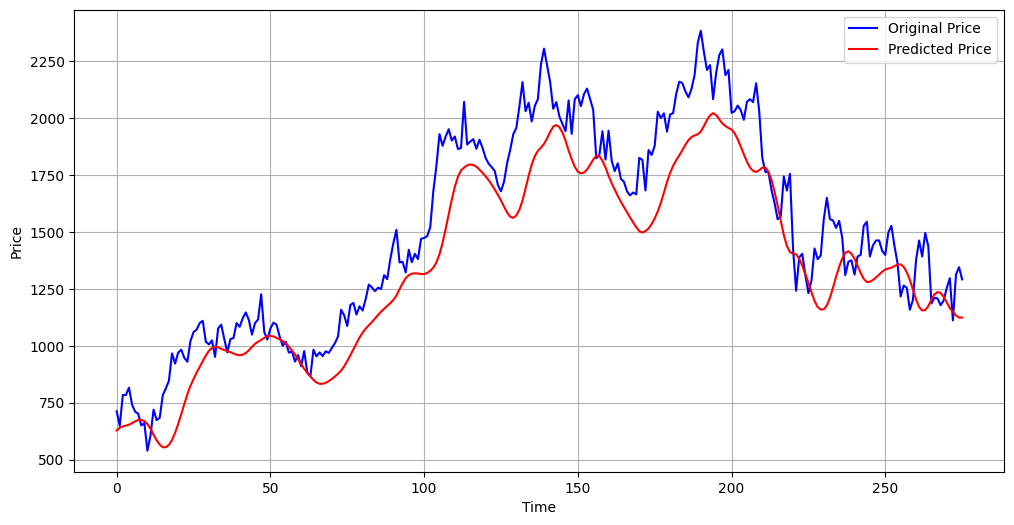

In [119]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [120]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.95%


Calculation of R2 score

In [121]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.7981998410802857


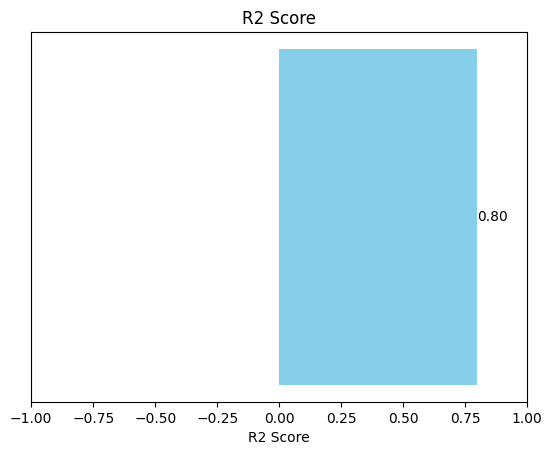

In [122]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

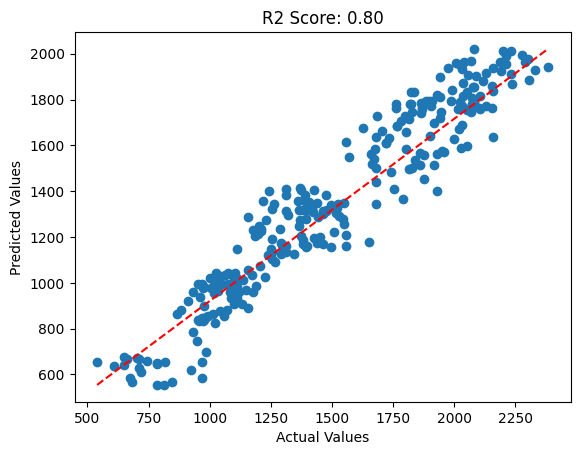

In [123]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()